# Regression

In [1]:
import pandas as pd 
import numpy as np

## 1. Import Data

In [2]:
df_eviction = pd.read_csv('../data/processed/Eviction.csv')
df_incidents = pd.read_csv('../data/processed/incidents.csv')

In [3]:
df_eviction.head()

,EvictionID,Address,City,State,Zipcode,Date,Nonpayment,Breach,Nuisance,IllegalUse,...,Development,GoodSamaritanEnds,SupervisorDistrict,Neighborhoods,Location,X,Y,Day,Month,Year
0,m192806,700 block of kearny street,san francisco,ca,94111,2019-10-18,False,True,False,False,...,False,False,3.0,chinatown,-122.40476763634015 37.79466465355738,-122.404768,37.794665,18,10,2019
1,m192020,400 block of 35th avenue,san francisco,ca,94121,2019-08-16,False,False,False,False,...,False,False,1.0,outer richmond,-122.4954513144922 37.780562090999126,-122.495451,37.780562,16,8,2019
2,m192145,200 block of font boulevard,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,False,7.0,lakeshore,-122.47509247803765 37.71643640083831,-122.475092,37.716436,28,8,2019
3,m191890,0 block of levant street,san francisco,ca,94114,2019-08-02,False,False,False,False,...,False,False,8.0,castro/upper market,-122.44212894562347 37.764255519062026,-122.442129,37.764256,2,8,2019
4,m192140,0 block of bucareli drive,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,False,7.0,lakeshore,-122.4793742747656 37.71746280191635,-122.479374,37.717463,28,8,2019


In [4]:
df_incidents.head()

,Unnamed: 0,IncidentNum,Category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month,Day
0,0,110308742,missing person,found person,friday,2011-04-15,16:00:00,taraval,located,0 block of crespi dr,-122.476328,37.719687,point (-122.476327815126 37.7196874952717),1.103087e+13,2011.0,4.0,15.0
1,1,90316914,warrants,warrant arrest,thursday,2009-03-26,12:28:00,southern,"arrest, booked",1000 block of market st,-122.411340,37.781271,point (-122.411339562557 37.7812707434494),9.031691e+12,2009.0,3.0,26.0
2,2,130132311,secondary codes,domestic violence,friday,2013-02-15,02:00:00,park,"arrest, booked",castro st / market st,-122.435188,37.762670,point (-122.435187699349 37.7626702770872),1.301323e+13,2013.0,2.0,15.0
3,3,80052833,other offenses,"drivers license, suspended or revoked",tuesday,2008-01-15,20:13:00,mission,"arrest, cited",valencia st / 16th st,-122.421886,37.764918,point (-122.421886357981 37.7649178909424),8.005283e+12,2008.0,1.0,15.0
4,4,70535770,secondary codes,domestic violence,saturday,2007-05-26,18:10:00,mission,"arrest, booked",2800 block of folsom st,-122.413935,37.751693,point (-122.413935404044 37.7516932889916),7.053577e+12,2007.0,5.0,26.0


In [5]:
districts = df_incidents.groupby(['PdDistrict']).IncidentNum.count()
districts

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: IncidentNum, dtype: int64

In [6]:
ngbh_dist = {
    'bayview hunters point': 'bayview',
    'bernal heights': 'ingleside',
    'castro/upper market': 'mission',
    'chinatown': 'central',
    'excelsior': 'ingleside',
    'financial district/south beach': 'central',
    'glen park': 'ingleside',
    'golden gate park': 'richmond',
    'haight ashbury': 'park',
    'hayes valley': 'northern',
    'inner richmond': 'richmond',
    'inner sunset': 'taraval',
    'japantown': 'northern',
    'lakeshore': 'taraval',
    'lincoln park': 'richmond',
    'lone mountain/usf': 'park',
    'marina': 'northern',
    'mclaren park': 'ingleside',
    'mission' : 'mission',
    'mission bay': 'bayview',
    'nob hill': 'central',
    'noe valley': 'mission',
    'north beach': 'central',
    'oceanview/merced/ingleside': 'ingleside',
    'outer mission': 'ingleside',
    'outer richmond': 'richmond',
    'pacific heights': 'northern',
    'portola': 'bayview',
    'potrero hill': 'bayview',
    'presidio': 'richmond',
    'presidio heights': 'richmond',
    'russian hill': 'central',
    'seacliff': 'richmond',
    'south of market': 'southern',
    'sunset/parkside': 'taraval',
    'tenderloin': 'tenderloin',
    'treasure island': 'southern',
    'twin peaks': 'park',
    'visitacion valley': 'ingleside',
    'west of twin peaks': 'ingleside',
    'western addition': 'northern'
}
df_eviction["PdDistrict"] = df_eviction["Neighborhoods"].apply(lambda x: ngbh_dist.get(x))
df_eviction.head()

,EvictionID,Address,City,State,Zipcode,Date,Nonpayment,Breach,Nuisance,IllegalUse,...,GoodSamaritanEnds,SupervisorDistrict,Neighborhoods,Location,X,Y,Day,Month,Year,PdDistrict
0,m192806,700 block of kearny street,san francisco,ca,94111,2019-10-18,False,True,False,False,...,False,3.0,chinatown,-122.40476763634015 37.79466465355738,-122.404768,37.794665,18,10,2019,central
1,m192020,400 block of 35th avenue,san francisco,ca,94121,2019-08-16,False,False,False,False,...,False,1.0,outer richmond,-122.4954513144922 37.780562090999126,-122.495451,37.780562,16,8,2019,richmond
2,m192145,200 block of font boulevard,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,7.0,lakeshore,-122.47509247803765 37.71643640083831,-122.475092,37.716436,28,8,2019,taraval
3,m191890,0 block of levant street,san francisco,ca,94114,2019-08-02,False,False,False,False,...,False,8.0,castro/upper market,-122.44212894562347 37.764255519062026,-122.442129,37.764256,2,8,2019,mission
4,m192140,0 block of bucareli drive,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,7.0,lakeshore,-122.4793742747656 37.71746280191635,-122.479374,37.717463,28,8,2019,taraval


In [7]:
evictions=df_eviction.groupby('PdDistrict').PdDistrict.count()
evictions

PdDistrict
bayview       2249
central       3988
ingleside     5428
mission       7356
northern      4567
park          2441
richmond      3696
southern      1483
taraval       5562
tenderloin    2582
Name: PdDistrict, dtype: int64

In [8]:
incidents=df_incidents.groupby('PdDistrict').PdDistrict.count()
incidents

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: PdDistrict, dtype: int64

In [9]:
evList=[]
for x in range(0, len(evictions)):
    evList.append(evictions[x])
evtotal=sum(evList)
evPerc=[]
for x in evList:
    evPerc.append(x/evtotal)
evPerc

[0.05715084366741208,
 0.1013417361252287,
 0.137934539540557,
 0.1869282374466355,
 0.1160550924984753,
 0.06202988412278918,
 0.09392152876600936,
 0.037685505183980485,
 0.14133970319170563,
 0.06561292945720675]

In [10]:
incList=[]
for x in range(0, len(incidents)):
    incList.append(incidents[x])
inctotal=sum(incList)
incPerc=[]
for x in incList:
    incPerc.append(x/inctotal)
incPerc

[0.10021661999572157,
 0.10080153252865301,
 0.08771953492226542,
 0.13441039467623597,
 0.12377982620292514,
 0.05643875956144087,
 0.0524272424698534,
 0.18091335007448722,
 0.07584976131328763,
 0.08744297825512978]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.scatter(evPerc, incPerc)
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
dict = {'Evictions': evPerc, 'Indicents': incPerc }   
df_perc = pd.DataFrame(dict) 
df_perc

,Evictions,Indicents
0,0.057151,0.100217
1,0.101342,0.100802
2,0.137935,0.087720
3,0.186928,0.134410
4,0.116055,0.123780
5,0.062030,0.056439
6,0.093922,0.052427
7,0.037686,0.180913
8,0.141340,0.075850
9,0.065613,0.087443


In [13]:
incidents

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: PdDistrict, dtype: int64

In [14]:
list1=df_eviction['PdDistrict'].unique()
list1=list(list1)
list1=sorted(list1)
list1

['bayview',
 'central',
 'ingleside',
 'mission',
 'northern',
 'park',
 'richmond',
 'southern',
 'taraval',
 'tenderloin']

In [15]:
df = pd.DataFrame({'Eviction': evPerc,'Incidents': incPerc}, index=list1)
df

,Eviction,Incidents
bayview,0.057151,0.100217
central,0.101342,0.100802
ingleside,0.137935,0.087720
mission,0.186928,0.134410
northern,0.116055,0.123780
park,0.062030,0.056439
richmond,0.093922,0.052427
southern,0.037686,0.180913
taraval,0.141340,0.075850
tenderloin,0.065613,0.087443


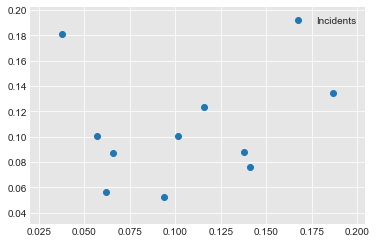

In [16]:
fig,ax=plt.subplots()
plt.scatter(df['Eviction'], df['Incidents'])
ax.legend()
plt.show()

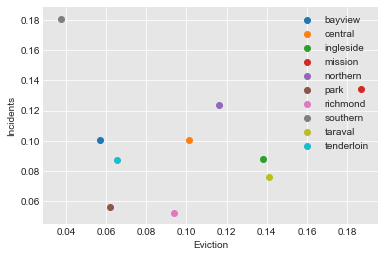

In [17]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.xlabel('Eviction')
plt.ylabel('Incidents')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df['Eviction'].values.reshape(-1,1)
y = df['Incidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([[0.10784075],
       [0.10807469]])

In [21]:
y_pred = [y for x in y_pred for y in x]
y_test = [y for x in y_test for y in x]
X_test = [y for x in X_test for y in x]
X_train = [y for x in X_train for y in x]
y_train = [y for x in y_train for y in x]

In [22]:
dict = {'Actual': y_test, 'Predicted': y_pred}   
df_pred = pd.DataFrame(dict) 
df_pred

,Actual,Predicted
0,0.08772,0.107841
1,0.07585,0.108075


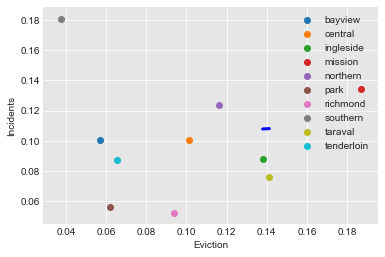

In [23]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Eviction')
plt.ylabel('Incidents')
plt.legend()
plt.show()

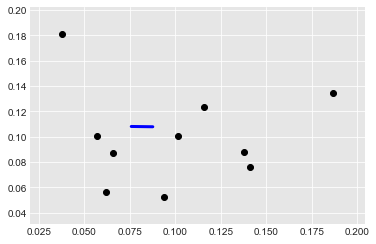

In [24]:
plt.scatter(evPerc, incPerc,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.show()

In [25]:
print(regressor.coef_)

[[0.06870088]]


In [26]:
colList=[]
for col in df_eviction.columns:
    colList.append(col) #list of attributes
colList

['EvictionID',
 'Address',
 'City',
 'State',
 'Zipcode',
 'Date',
 'Nonpayment',
 'Breach',
 'Nuisance',
 'IllegalUse',
 'FailureToSign',
 'AccessDenial',
 'Unapproved Subtenant',
 'OwnerMoveIn',
 'Demolition',
 'CapitalImprovement',
 'Rehab',
 'Withdrawl',
 'Condoconversion',
 'Roomate',
 'Other',
 'LatePayments',
 'LeadRemediation',
 'Development',
 'GoodSamaritanEnds',
 'SupervisorDistrict',
 'Neighborhoods',
 'Location',
 'X',
 'Y',
 'Day',
 'Month',
 'Year',
 'PdDistrict']

In [27]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

goods=[]
for x in range(6,25):
    df_eviction[colList[x]] = le.fit_transform(df_eviction[colList[x]].astype(str))
    goods.append(colList[x])

df_eviction["PdDistrictLE"] = le.fit_transform(df_eviction["PdDistrict"].astype(str))

df_eviction.head(10)

,EvictionID,Address,City,State,Zipcode,Date,Nonpayment,Breach,Nuisance,IllegalUse,...,SupervisorDistrict,Neighborhoods,Location,X,Y,Day,Month,Year,PdDistrict,PdDistrictLE
0,m192806,700 block of kearny street,san francisco,ca,94111,2019-10-18,0,1,0,0,...,3.0,chinatown,-122.40476763634015 37.79466465355738,-122.404768,37.794665,18,10,2019,central,1
1,m192020,400 block of 35th avenue,san francisco,ca,94121,2019-08-16,0,0,0,0,...,1.0,outer richmond,-122.4954513144922 37.780562090999126,-122.495451,37.780562,16,8,2019,richmond,6
2,m192145,200 block of font boulevard,san francisco,ca,94132,2019-08-28,0,1,0,0,...,7.0,lakeshore,-122.47509247803765 37.71643640083831,-122.475092,37.716436,28,8,2019,taraval,8
3,m191890,0 block of levant street,san francisco,ca,94114,2019-08-02,0,0,0,0,...,8.0,castro/upper market,-122.44212894562347 37.764255519062026,-122.442129,37.764256,2,8,2019,mission,3
4,m192140,0 block of bucareli drive,san francisco,ca,94132,2019-08-28,0,1,0,0,...,7.0,lakeshore,-122.4793742747656 37.71746280191635,-122.479374,37.717463,28,8,2019,taraval,8
5,m191948,700 block of haight street,san francisco,ca,94117,2019-08-09,0,1,0,0,...,5.0,haight ashbury,-122.43454290933225 37.77152964961175,-122.434543,37.771530,9,8,2019,park,5
6,m191509,2800 block of folsom street,san francisco,ca,94110,2019-07-03,0,0,0,0,...,9.0,mission,-122.41407486280637 37.75169997912014,-122.414075,37.751700,3,7,2019,mission,3
7,m190093,200 block of montana street,san francisco,ca,94112,2019-01-16,1,0,0,0,...,11.0,oceanview/merced/ingleside,-122.46142291178968 37.716526917892736,-122.461423,37.716527,16,1,2019,ingleside,2
8,m191965,1700 block of 28th avenue,san francisco,ca,94122,2019-08-13,0,0,0,0,...,4.0,sunset/parkside,-122.48611379786693 37.75475202208017,-122.486114,37.754752,13,8,2019,taraval,8
9,m191851,1000 block of bush street,san francisco,ca,94109,2019-08-05,0,0,1,0,...,3.0,nob hill,-122.41456113260082 37.789478817108304,-122.414561,37.789479,5,8,2019,central,1


In [28]:
labels = df_eviction['PdDistrictLE']
features = df_eviction[goods]
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size=0.20)
# Model the data
model = LinearRegression()
model.fit(train_features, train_labels)
model.score(test_features, test_labels)

0.04982808958656626

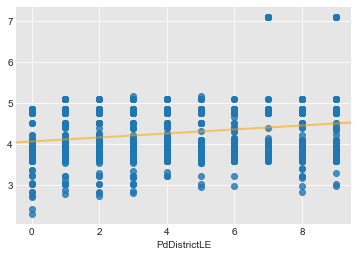

In [29]:
pred_labels = model.predict(test_features) 
# Plot prediction and actual data
sns.regplot(x = test_labels, 
            y = pred_labels, 
            data = model,
            line_kws={"color":"orange","alpha":0.5,"lw":2}
           )

In [30]:
from statistics import mean
import numpy as np

xs = np.array(evPerc)
ys = np.array(incPerc)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-0.03962298751335198 0.1039622987513352


In [31]:
regression_line = [(m*x)+b for x in xs]

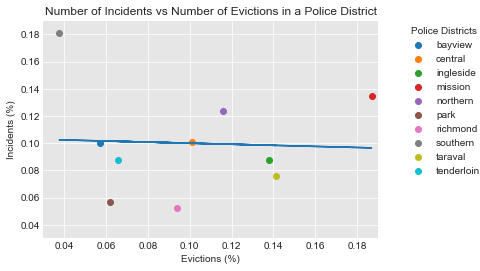

In [32]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.title("Number of Incidents vs Number of Evictions in a Police District")
plt.xlabel('Evictions (%)')
plt.ylabel('Incidents (%)')
plt.legend(title="Police Districts")
plt.plot(xs, regression_line)
plt.xlim([.03, .19])
plt.ylim([.03, .19])
leg = plt.legend( loc = 'upper right', title="Police Districts")

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = list(df['Eviction'])
y = list(df['Incidents'])
x = np.array(X).reshape((-1, 1))
y = np.array(y)
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0022749830917798697


In [34]:
df=df.drop(['southern'])
df

,Eviction,Incidents
name,,
bayview,0.057151,0.100217
central,0.101342,0.100802
ingleside,0.137935,0.087720
mission,0.186928,0.134410
northern,0.116055,0.123780
park,0.062030,0.056439
richmond,0.093922,0.052427
taraval,0.141340,0.075850
tenderloin,0.065613,0.087443


In [35]:
xs = np.array(list(df['Eviction']))
ys = np.array(list(df['Incidents']))

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.3217483820100879 0.05660705758151149


In [36]:
regression_line = [(m*x)+b for x in xs]

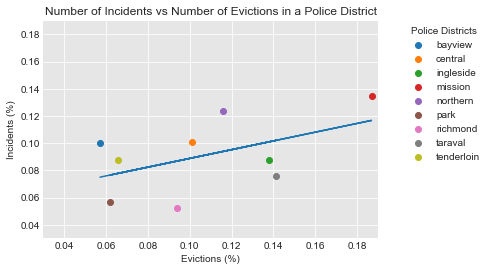

In [37]:
for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.title("Number of Incidents vs Number of Evictions in a Police District")
plt.xlabel('Evictions (%)')
plt.ylabel('Incidents (%)')
plt.legend(title="Police Districts")
plt.plot(xs, regression_line)
plt.xlim([.03, .19])
plt.ylim([.03, .19])
leg = plt.legend( loc = 'upper right', title="Police Districts")

plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = .3
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = list(df['Eviction'])
y = list(df['Incidents'])
x = np.array(X).reshape((-1, 1))
y = np.array(y)
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model = LinearRegression().fit(x, y)

In [40]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.2561066201735942


In [41]:
from "../src/freatures/supervisor_districts.py" 

SyntaxError: invalid syntax (<ipython-input-41-b4009d795603>, line 1)

In [ ]:
import numpy as np
import pandas as pd
import re
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

class __SupervisorDistricts:

  def __init__(self):
    self.__shapes = self.__gen_shapes()

  def __gen_shapes(self):
    df = pd.read_csv("../../data/raw/Current_Supervisor_Districts.csv").sort_values(by="supervisor")
    shapes = []
    # test_df = [["Test1", "MULTIPOLYGON (((1 1, 1 2, 2 2, 2 1)))"],
    #            ["Test2", "MULTIPOLYGON (((1 1, 1 2, 2 2, 2 1)), ((-1 -1, -1 -2, -2 -2, -2 -1)))"]]
    # for i, row in enumerate(test_df):
    for i, row in enumerate(df.values):
      coords_str = re.compile(r"MULTIPOLYGON \(\(\((.+)\)\)\)").match(row[1]).group(1)
      coords_list = []
      if coords_str.find(")") != -1:
        coords_list = re.compile(r"(.+)\)\), \(\((.+)").match(coords_str).groups()
      else:
        coords_list = [coords_str]
      for coords in coords_list:
        coords_split = coords.split(", ")
        list_of_coords = []
        for coord in coords_split:
          coord = coord.split(" ")
          list_of_coords.append((float(coord[0]), float(coord[1])))
        if len(shapes) == i:
          shapes.append((row[0], Polygon(list_of_coords)))
        else:
          shapes[i] = (shapes[i][0], shapes[i][1].union(Polygon(list_of_coords)))
    return shapes

  def get_district(self, lat, lon):
    p = Point(lat, lon)
    for i, (name, shape) in enumerate(self.__shapes):
      if shape.contains(p):
        return {"district_num": i + 1, "name": name}
    raise Exception("District not found for point ({}, {})".format(lat, lon))

sd = __SupervisorDistricts()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,18,19,20,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/